# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [23]:
df = pd.read_excel('KyotoFullFlower7.xls')


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [24]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25)


## 3. Look at the final five rows of the data

In [4]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df = pd.read_excel('KyotoFullFlower7.xls', skiprows=25, na_values='-')

## 4. What source is the most common as a reference?

In [7]:
df['Reference Name'].value_counts()

NEWS-PAPER(ARASHIYAMA)            94
SUGIURAKE-NIKKI                   38
MYOHOIN-HINAMIKI                  32
OYUDONONO-UENO-NIKKI              26
OYUDONONO-UENO-NIKKI [EDA]        21
DAIGOJI-ZATSUYO                   21
NIHONKIRYAKU                      19
SANETAKA-KOKI                     19
(SHIRYO-SORAN)                    15
KAKUMEIKI                         15
ZOKU-SHIGUSHO                     14
INRYOGEN-NICHIROKU                13
NISUIKI                           13
MEIGETSUKI                        12
GUKANKI                           10
GIENJUNKO-NIKKI(DAIGO)            10
KEIHAN RAILWAY ADV(ARASHIYAMA)     9
DAIGO-ZOJIKI                       9
KANMON-GYOKI(FUSHIMI)              9
MOTOHIRO-KOKI                      9
HANAZONOTENNO-SHINKI               8
TOKIYOSHI-KYOKI                    8
MANZAIJUNGO-NIKKI(DAIGO)           8
ZOKU-HONCHOTSUKAN                  8
TOKITSUGU-KYOKI                    8
TAKAGI-ZAICHU-NIKKI                8
TERUYOSHI-KOKI                     8
R

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [8]:
df = df.dropna(subset=['Full-flowering date (DOY)'])
df['Full-flowering date (DOY)'].sort_values()

608      86.0
845      87.0
160      87.0
435      87.0
811      87.0
1189     88.0
567      88.0
154      89.0
960      89.0
355      90.0
1201     91.0
1197     91.0
612      91.0
980      91.0
431      92.0
651      92.0
11       92.0
260      92.0
1203     92.0
1158     92.0
1212     93.0
1188     93.0
1181     93.0
1176     93.0
860      93.0
818      93.0
936      93.0
686      93.0
756      93.0
793      93.0
        ...  
422     116.0
901     116.0
449     116.0
1006    116.0
518     116.0
372     117.0
748     117.0
967     117.0
203     117.0
555     117.0
1061    117.0
840     117.0
883     118.0
747     118.0
1062    118.0
742     119.0
393     119.0
989     119.0
752     119.0
954     120.0
462     120.0
894     120.0
1038    120.0
1011    120.0
738     120.0
283     120.0
755     120.0
739     122.0
815     122.0
522     124.0
Name: Full-flowering date (DOY), Length: 827, dtype: float64

## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

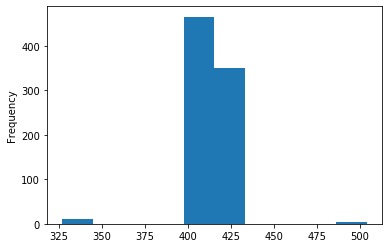

In [9]:
df['Full-flowering date'].sort_values().plot('hist')

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

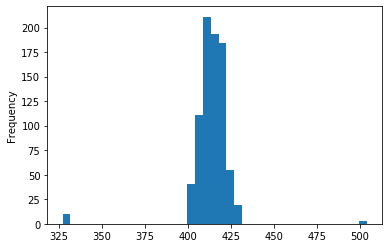

In [10]:
df['Full-flowering date'].sort_values().plot('hist', bins = 39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [11]:
df['Full-flowering date (DOY)'].mean()

104.54050785973398

In [12]:
df['Full-flowering date (DOY)'].sum()

86455.0

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [13]:
df[df['AD'] < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [14]:
df[df['AD'] > 1900]['Full-flowering date (DOY)'].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

## 13. Show only the years where our data was from a title in Japanese poetry

## 14. Graph the full-flowering date (DOY) over time

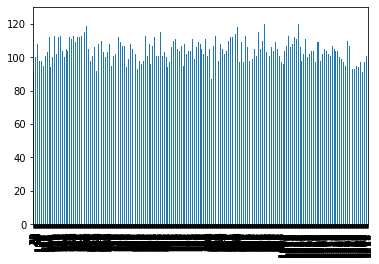

In [15]:
df['Full-flowering date (DOY)'].plot(kind='bar')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

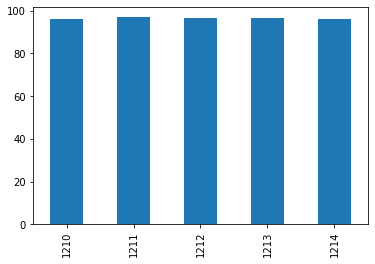

In [16]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail().plot(kind='bar')

In [17]:
rolling_date = df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()

In [18]:
df['rolling_date'] = df['Full-flowering date']

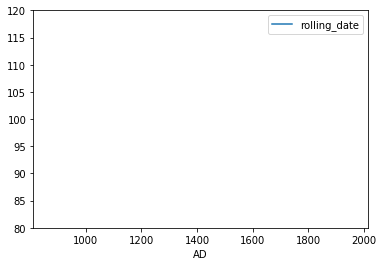

In [19]:
df.plot(x='AD', y='rolling_date', ylim=(80, 120)) 

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [20]:
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

### 17. Using your new column, how many blossomings happened in each month?

### 18. Graph how many blossomings happened in each month.

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [21]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [22]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + "!!!").head()

11    4!!!
14    4!!!
30    4!!!
50    4!!!
52    4!!!
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

# YOU ARE DONE.

And **incredible.**